In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random
from scipy.spatial import KDTree
%matplotlib inline

In [2]:
def bifurcation_plot(x_0, savepng = False):
    
    r = np.arange(1, 4, .001)
    
    plt.figure(figsize = (22,17))
    
    n = 40
    buckets = [[] for _ in range(len(r))]
    
    error = .00001
    
    for i in range(len(r)):
        x = x_0
        
        for j in range(700):
            x = r[i] * x * (1 - x)
        
        for j in range(n):
#             if x not in buckets[i]:
#                 buckets[i].append(x)
    
            if j == 0:
                buckets[i].append(x)
            
            elif not any(np.abs(buckets[i] - x) < error): # not any(x - error < buckets[i] and buckets[i] < x + error):
                buckets[i].append(x)
            
            x = r[i] * x * (1 - x)  
    
    
    
    # colors = cm.get_cmap('nipy_spectral', n)
    # colors = cm.get_cmap('tab20', n)
    colors = cm.get_cmap('hsv', n)
    
    # make a list of the r(x) and x(y) values to be plotted
    bf_x = []
    bf_r = []
    # index of lines
    bf_index = []
    
    # iterate through n, think of this as the number of lines being plotted:
        # at each value of n we will iterate through r:
            
            # if there are no x values in the bucket do nothing
            
            # if there are x values we need to check if they match up with the x values of a previous point (unless it is the first)
            
                # find the matching
            
                # once we have plotted an x value... how do we stop it from being replotted by accident?
    
    for r_i in range(len(r)):

        current_r = r[r_i]

        for n_i in range(len(buckets[r_i])):

            # print("r = " + str(current_r) + "\tlines: " + str(len(set(buckets[r_i]))) + "\txvalues: " + str(set(buckets[r_i])))

            current_x = buckets[r_i][n_i]



#                 bf_x[n_i].append(current_x)
#                 bf_r[n_i].append(current_r)  

            if r_i == 0:
                bf_x.append([ current_x ])
                bf_r.append([ current_r ])
                bf_index.append([r_i])

            else: # len(buckets[r_i]) == len(buckets[r_i-1]): # same number of lines

                # find the bf_x list with the last value = to the closest value
                closest_previous_line = -1

                for search in range(len(bf_x)): 

                    if len(bf_x[search]) == 0 or bf_index[search][-1] != r_i-1:
                        continue

                    diff = (np.abs(bf_x[search][-1] - current_x)) # returns the index of the value from the previous bucket with the smallest difference from the value
                    if closest_previous_line == -1 or diff < np.abs(bf_x[closest_previous_line][-1] - current_x):
                        closest_previous_line = search

                if closest_previous_line == -1:
                    bf_x.append([ current_x ])
                    bf_r.append([ current_r ])
                    bf_index.append([r_i])
                else:    
                    bf_x[closest_previous_line].append(current_x)
                    bf_r[closest_previous_line].append(current_r) 
                    bf_index[closest_previous_line].append(r_i)

                    
                if r_i+1 < len(buckets) and len(buckets[r_i]) < len(buckets[r_i+1]):
                    
                    new_lines_count = len(buckets[r_i+1]) - len(buckets[r_i])
                    for i in range(new_lines_count):
                        bf_x.append([ current_x ])
                        bf_r.append([ current_r ])
                        bf_index.append([r_i])

                #elif len(buckets[r_i]) > len(buckets[r_i-1]): # divergence

                    
                    
                    
                    
                
                
                      #  if len(buckets[r_i]) < len(buckets[r_i-1]): # convergence
        
    for i in range(len(bf_x)):
        plt.plot(bf_r[i], bf_x[i], c = colors(i/n), lw = .75)
        
        
    
    # set y and x ticks
   # plt.xticks(np.linspace(3.6,3.7,11))
   # plt.yticks(np.linspace(0,1,11)) 
    plt.grid()

    plt.xlabel('r')
    plt.ylabel('x')
    
    plt.title("$x_0$ =" + str(x_0))
    
    if(savepng):
        plt.savefig("bifurcation_diagram_modified1.png")
    
    plt.show()

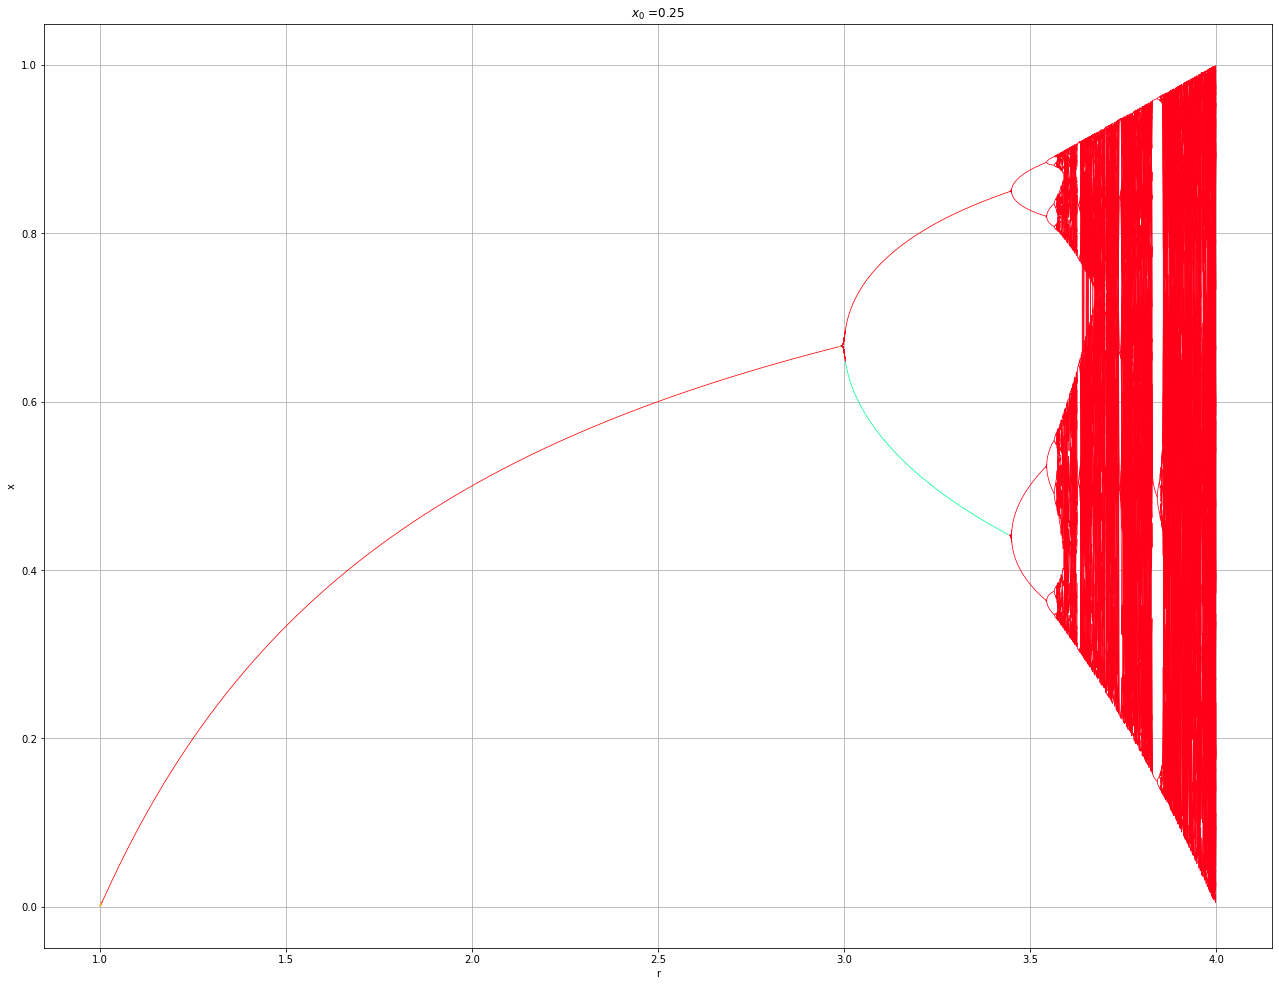

In [3]:
bifurcation_plot(.25)